**Problem:**

To develop a portfolio optimization strategy using the given stock market data. Process involves analyzing historical price trends, calculating key financial metrics, and applying Modern Portfolio Theory to construct an efficient portfolio.

**Primary Objectives:**

1. identify trends in stock prices using moving averages and other technical indicators.
2. calculate volatility and risk associated with each stock.
3. determine the correlation between different stocks to understand their relationships and potential diversification benefits.
4. generate and evaluate a series of random portfolios to identify the optimal portfolio that maximizes the Sharpe ratio, balancing risk and return effectively.

**Expected Outcome:**

1. identification of portfolio with maximum Sharpe ratio including weights of each stock and associated risk-return profile.
2. recommendations for constructing a diversified investment portfolio that maximizes return while minimizing risk based on historical performance and statistical analysis of the provided stock data

In [2]:
# loading the dataset

import pandas as pd
import yfinance as yf
from datetime import date, timedelta

# define time period for the data

end_date = date.today().strftime('%Y-%m-%d')
start_date = (date.today() - timedelta(days=365)).strftime('%Y-%m-%d')

# list of stock tickers to download

tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']
stock_data = yf.download(tickers, start=start_date, end=end_date, progress=False)

# reset index to bring date into the columns for the melt function

stock_data = stock_data.reset_index()

# melt the dataframe to make it long format where each row is a unique combination of date, ticker and attributes

stock_data_melted = stock_data.melt(id_vars=['Date'], var_name=['Attribute', 'Ticker'])

# pivot the melted dataframe to have the attributes (open, high, low, etc.) as columns

stock_data_pivoted = stock_data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='value', aggfunc='first')

# reset index to turn multi index into columns

stock_data_pivoted = stock_data_pivoted.reset_index()

stock_data_pivoted.head()

Attribute,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-08-16,HDFCBANK.NS,1584.562012,1606.199951,1609.650024,1581.300049,1583.099976,17068771.0
1,2023-08-16,INFY.NS,1392.525879,1418.500000,1419.949951,1405.400024,1410.800049,7735313.0
2,2023-08-16,RELIANCE.NS,2566.085449,2575.149902,2582.800049,2551.000000,2551.000000,5101556.0
3,2023-08-16,TCS.NS,3400.889893,3458.399902,3466.000000,3435.199951,3450.000000,1328445.0
4,2023-08-17,HDFCBANK.NS,1575.782104,1597.300049,1609.900024,1594.000000,1597.599976,26442020.0


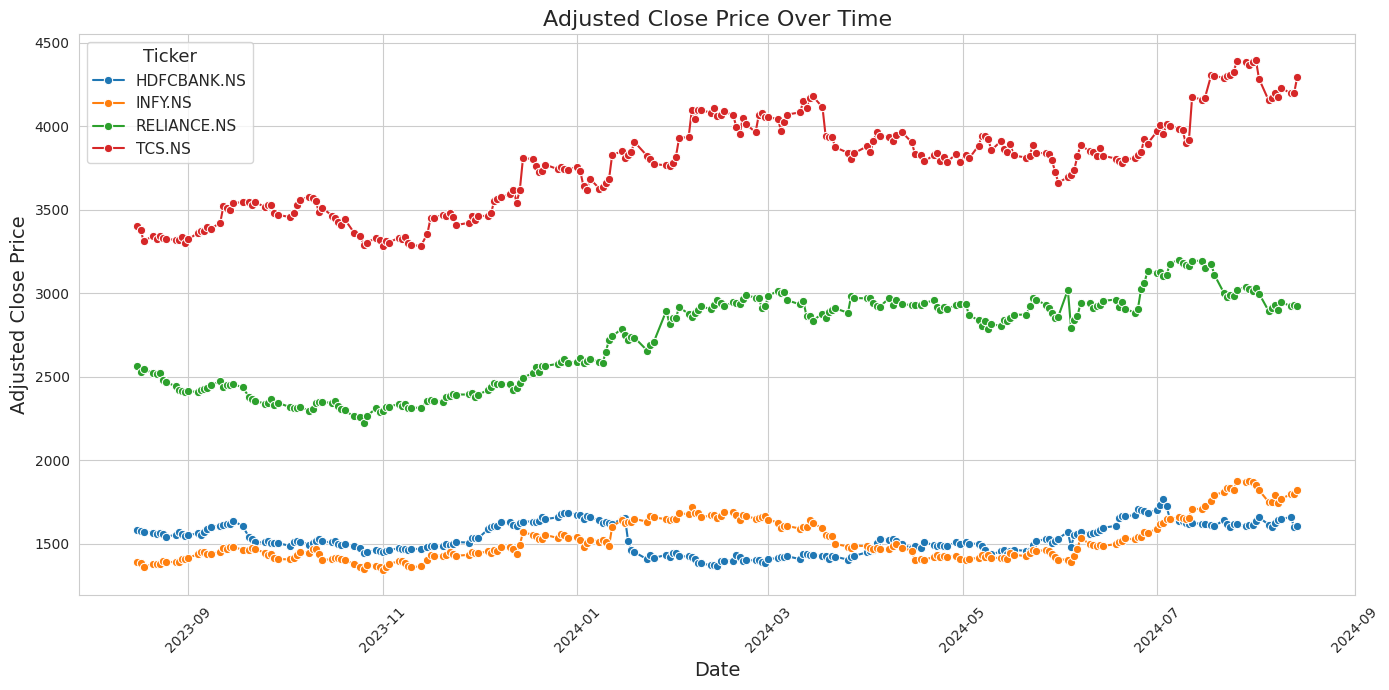

In [3]:
# plotting the stock market performance of these companies over time

import matplotlib.pyplot as plt
import seaborn as sns

stock_data_pivoted['Date'] = pd.to_datetime(stock_data_pivoted['Date'])

stock_data_pivoted.set_index('Date', inplace=True)

stock_data_pivoted.reset_index(inplace=True)

plt.figure(figsize=(14, 7))
sns.set_style('whitegrid')
sns.lineplot(data=stock_data_pivoted, x='Date', y='Adj Close', hue='Ticker', marker='o')
plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize=13, fontsize=11)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

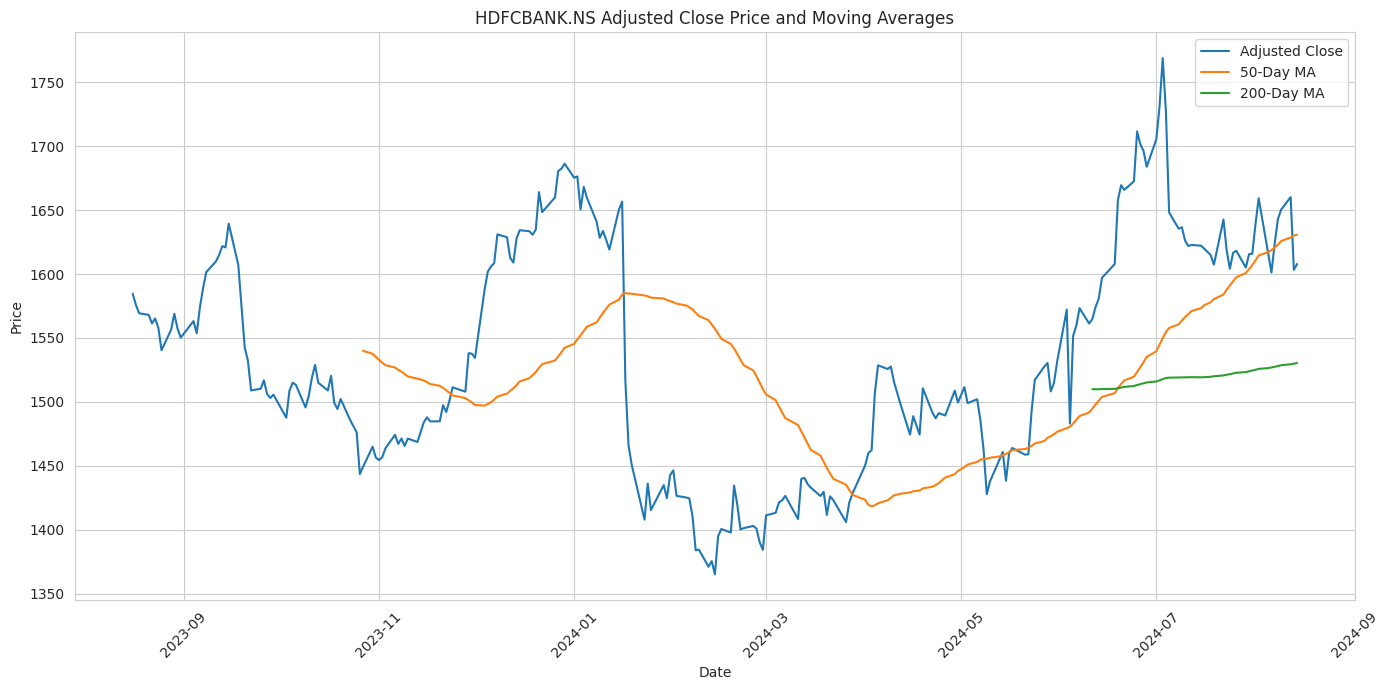

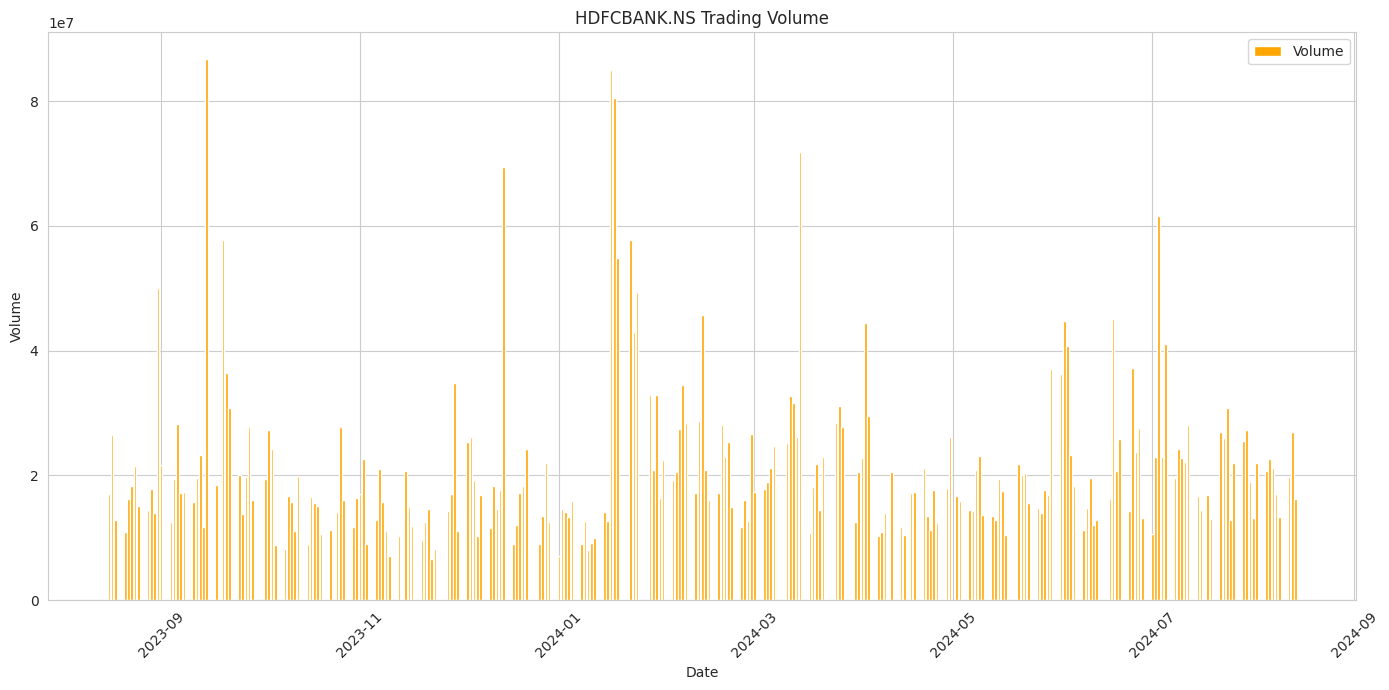

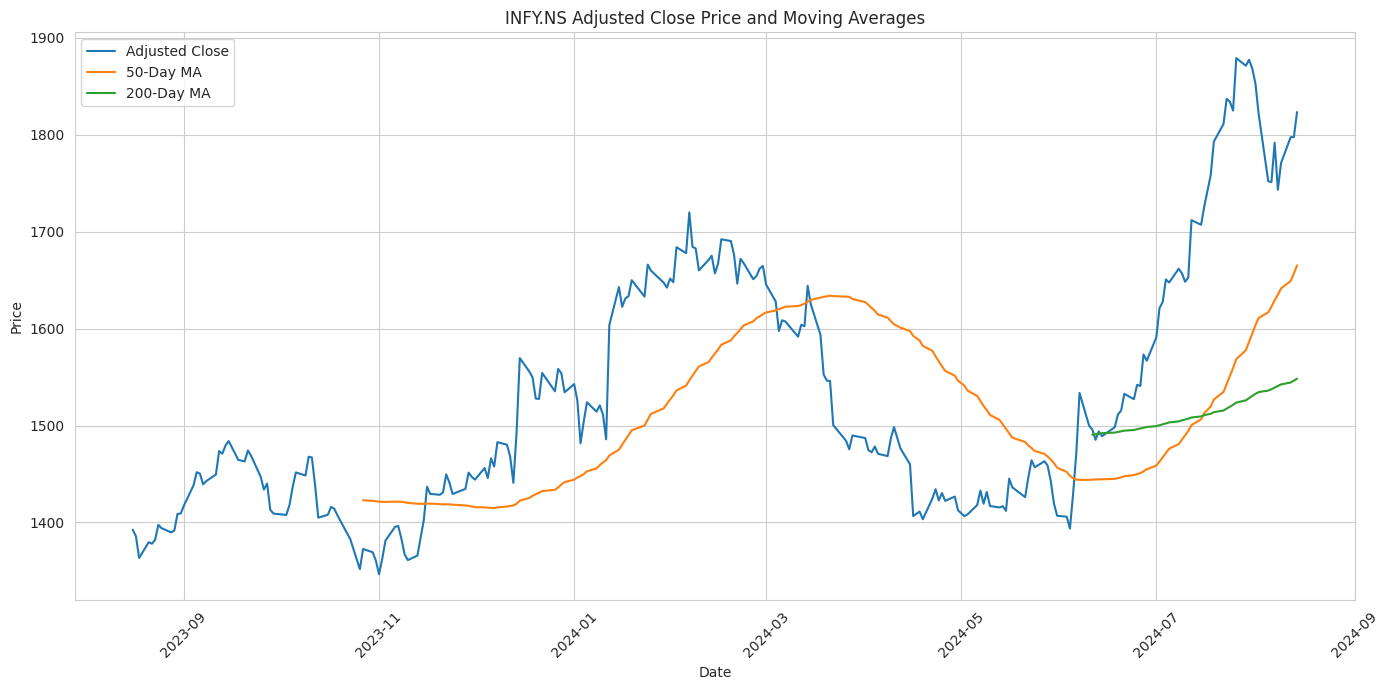

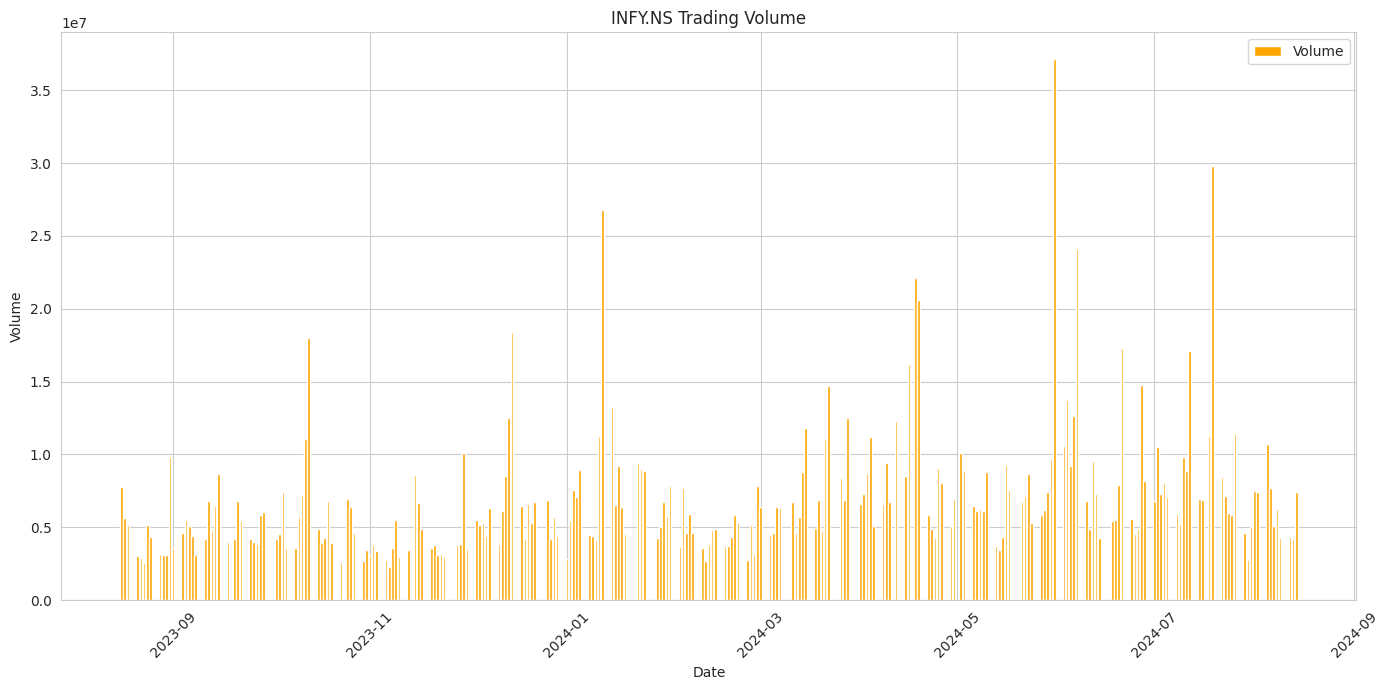

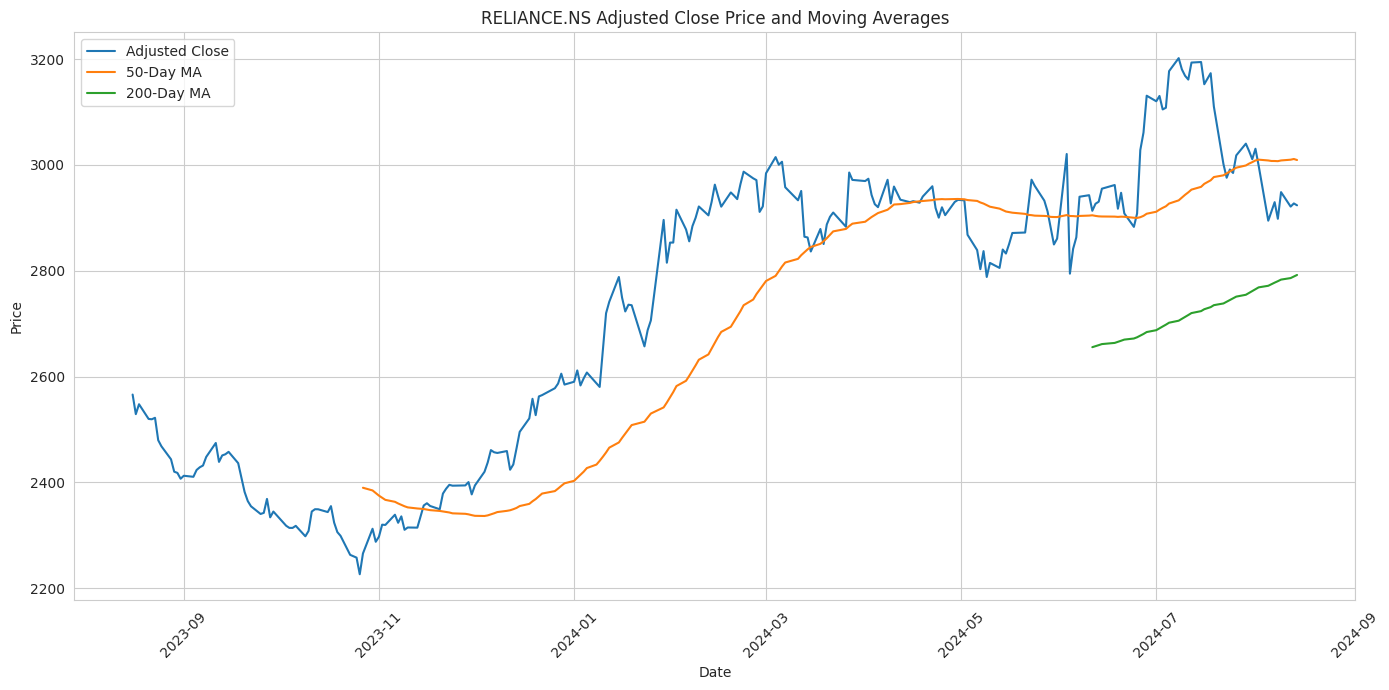

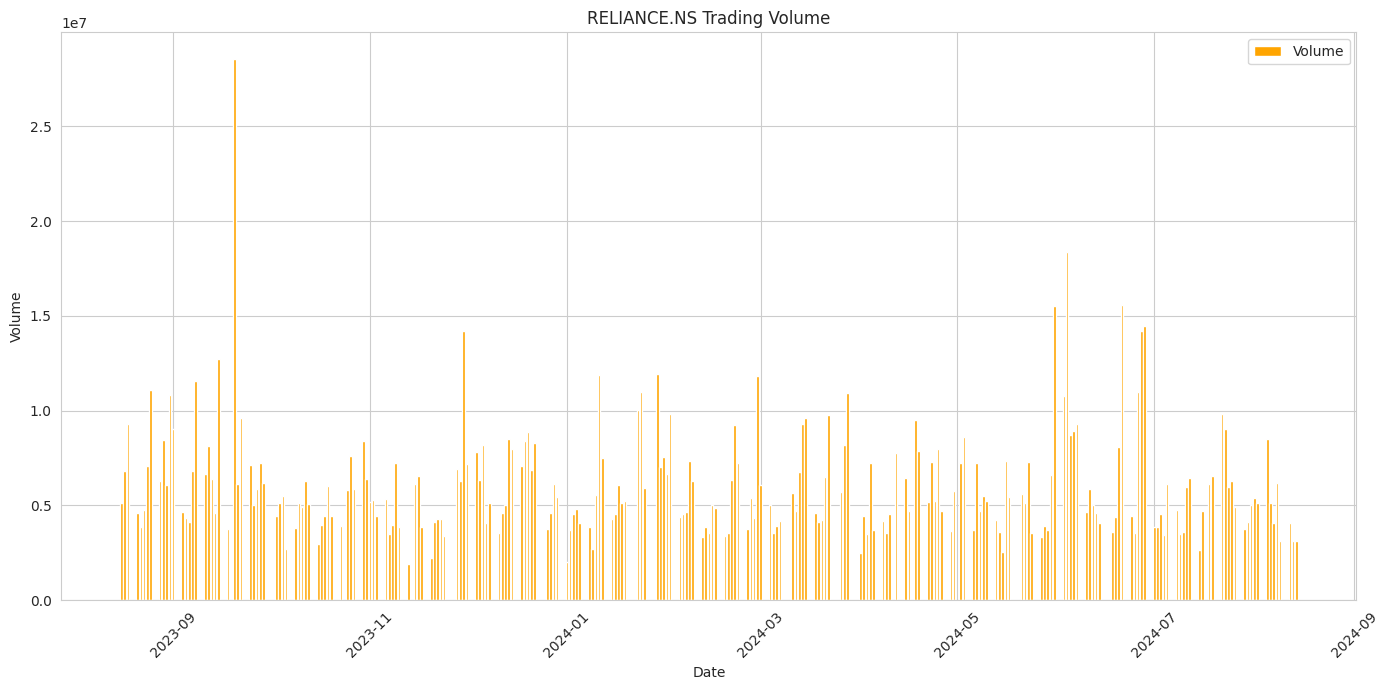

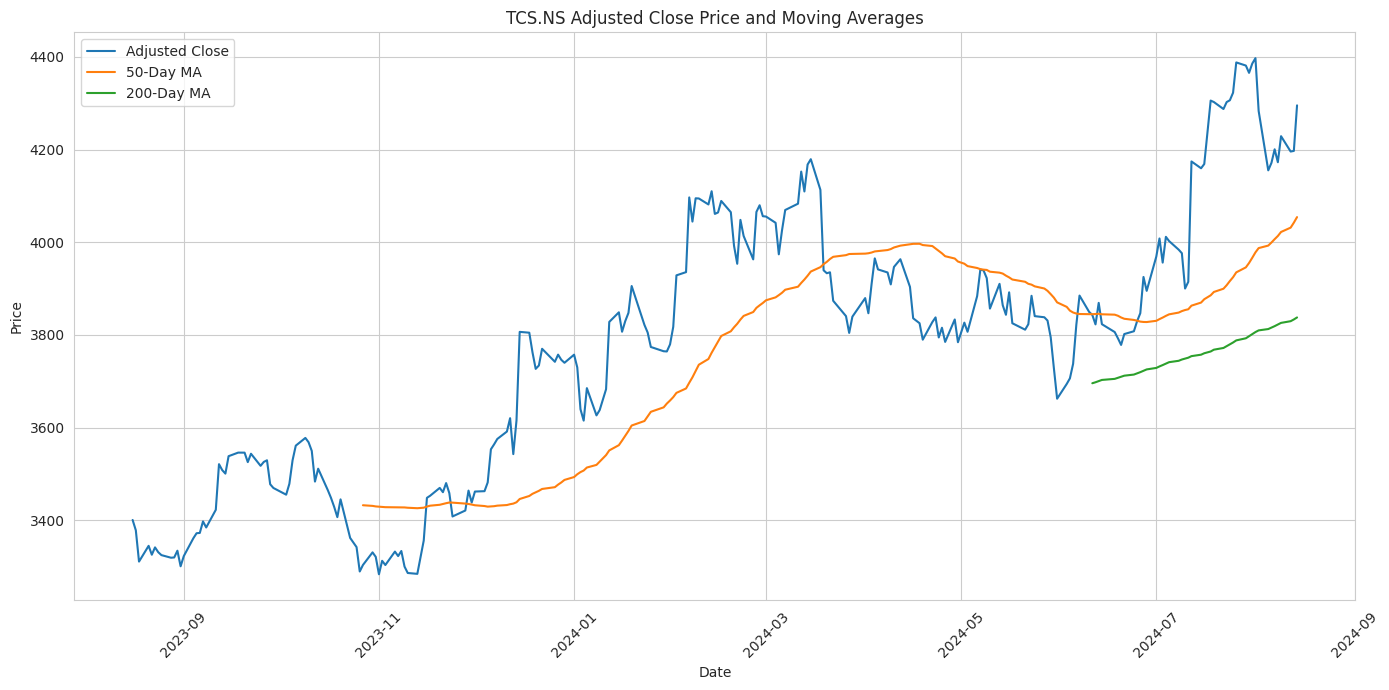

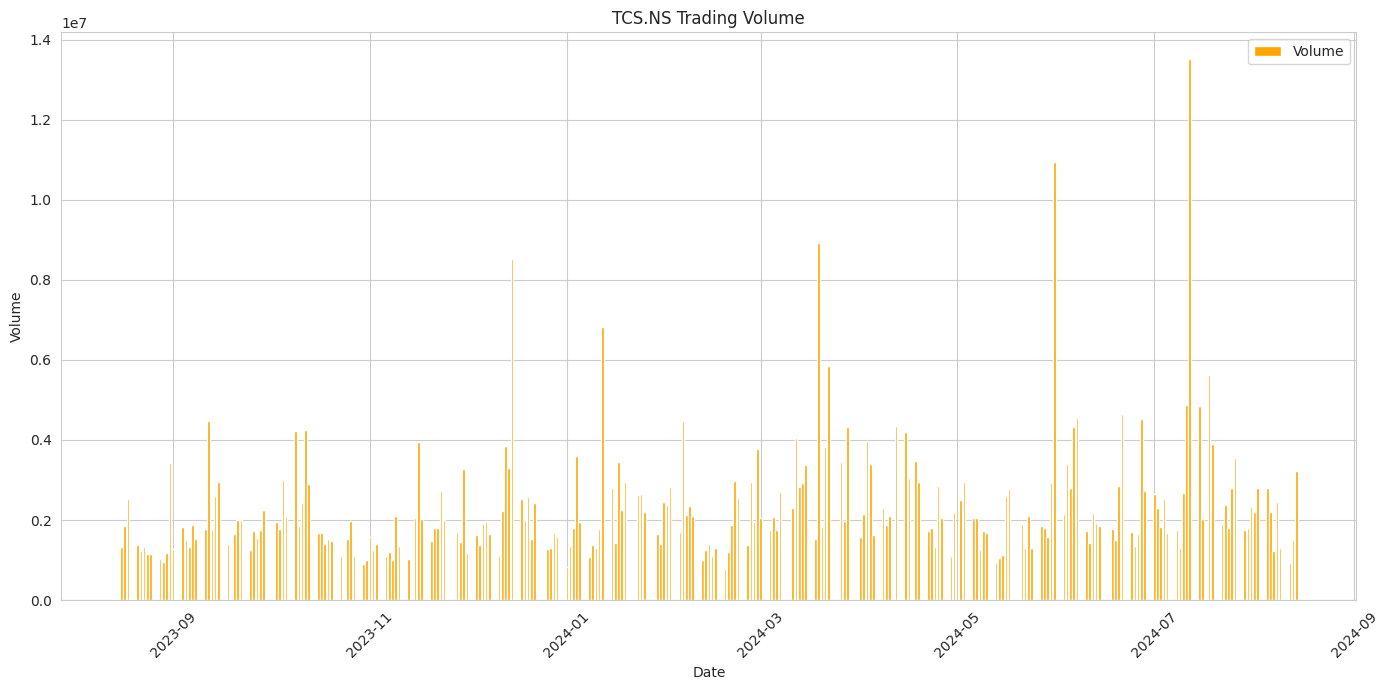

In [4]:
# 50 day and 200 day moving average calculation and plotting

short_window = 50
long_window = 200

stock_data_pivoted.set_index('Date', inplace=True)
unique_tickers = stock_data_pivoted['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = stock_data_pivoted[stock_data_pivoted['Ticker'] == ticker].copy()
    ticker_data['50_Day_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_Day_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adjusted Close')
    plt.plot(ticker_data.index, ticker_data['50_Day_MA'], label=f'{short_window}-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_Day_MA'], label=f'{long_window}-Day MA')
    plt.title(f'{ticker} Adjusted Close Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} Trading Volume')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

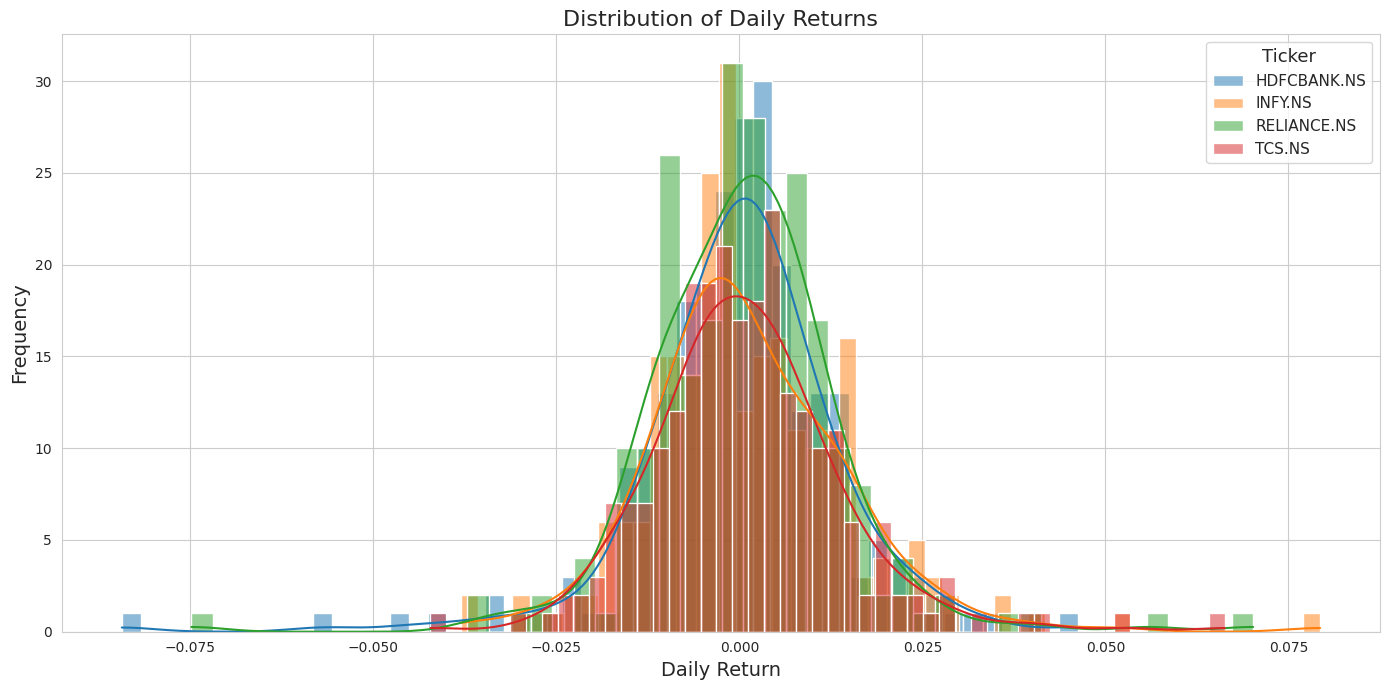

In [5]:
# distribution of daiy returns

stock_data_pivoted['Daily Return'] = stock_data_pivoted.groupby('Ticker')['Adj Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.set_style('whitegrid')

for ticker in unique_tickers:
    ticker_data = stock_data_pivoted[stock_data_pivoted['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), kde=True, label=ticker, bins=50, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize=13, fontsize=11)
plt.grid(True)
plt.tight_layout()
plt.show()

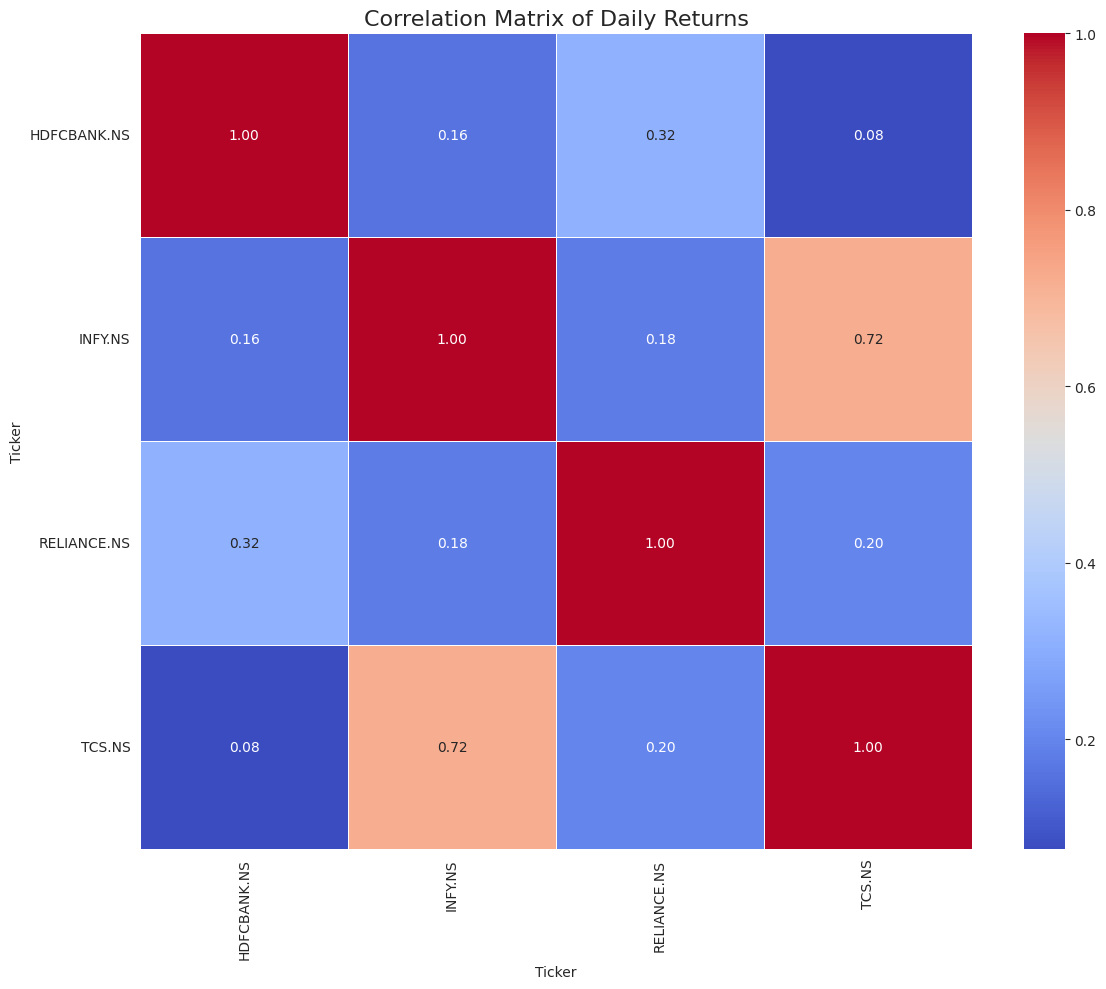

In [7]:
# correlation

daily_returns = stock_data_pivoted.pivot_table(index='Date', columns='Ticker', values='Daily Return')

correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12, 10))
sns.set_style('whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={'size': 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

INFY and TCS have high correlatio of 0.72 which indicate that they tend to move in the same direction.

HDFCBANK has moderate positive correlation with RELIANCE(0.32) and low correlation with INFY(0.16) and TCS(0.08).

RELIANCE shows low correlation with INFY(0.18) and TCS(0.20).

these varying correlations show suggest potential diversification benefits; combining stocks with lower correlation can reduce overall risk

Portfolio Optimization using Modern Portfolio Theory.

1. calculate expected returns and and volatility for each stock.
2. generate series of random portfolios to identify efficient frontier.
3. optimize portfolio to maximize the Sharpe Ratio, which is a measure of risk adjusted return

In [8]:
import numpy as np

expected_returns = daily_returns.mean() * 252 # annualize returns
volatility = daily_returns.std() * np.sqrt(252) # annualize volatility

stock_stats = pd.DataFrame({'Expected Return': expected_returns, 'Volatility': volatility})
stock_stats

,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.038814,0.216905
INFY.NS,0.303632,0.220564
RELIANCE.NS,0.158003,0.213430
TCS.NS,0.263141,0.205717


INFY has highest expected return of 30.36% and moderate volatility of 22.05%, which indicates low risk high reward investment with relatively high risk.

TCS and RELIANCE take second and third places respectively in this regard.

HDFCBANK is the lowest ranking stock interms of investablility.

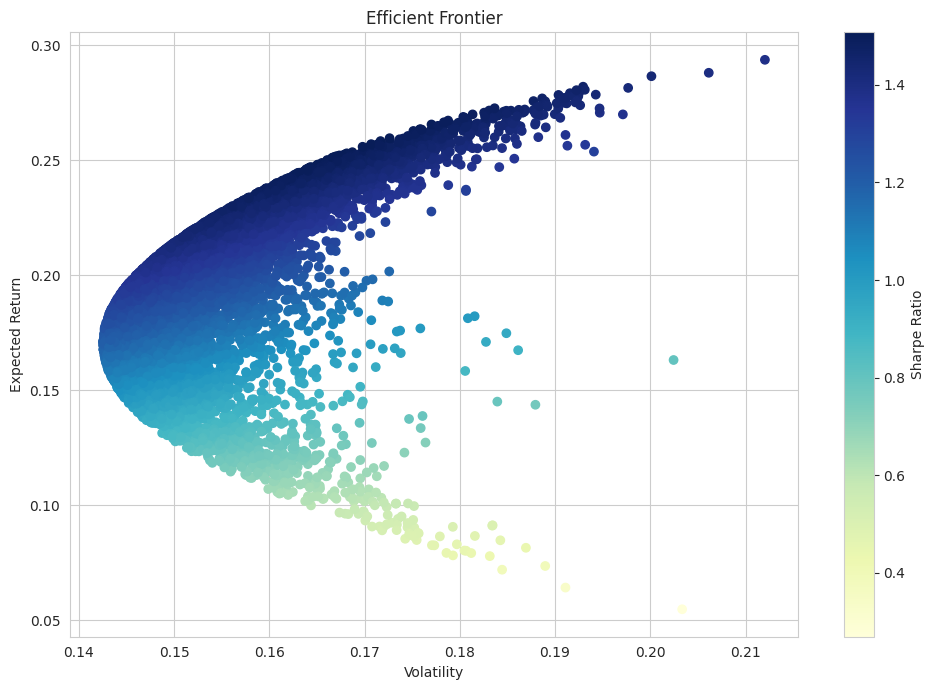

In [9]:
# function to calculate portfolio performance

def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# number of portfolios to simulate

num_portfolios = 10000

# arrays to store the results

results = np.zeros((3, num_portfolios))

# annualized covariance matrix

cov_matrix = daily_returns.cov() * 252

np.random.seed(42)

# generate random portfolios

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = portfolio_return / portfolio_volatility # Sharpe Ratio

plt.figure(figsize=(10, 7))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

each dot represents a portfolio with color representing the sharpe ratio.

the portfolio that offers highest expected returns for a given level of volatility is located closer to the y-axis and represents optimal portfolios.

gradient shows that portfolios with higher Sharpe ratios provide better risk-adjusted returns.



In [10]:
# identifying portfolio with highest sharpe ratio

max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.25178806623745165, 0.1670364136038798, 1.507384293071312)

portfolio with highest sharpe ratio has following characteristics:

1. expected return: ~25.17%
2. volatility: ~16.70%
3. sharpe ratio: ~1.50

In [11]:
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)
    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({'Ticker': unique_tickers, 'Weight': max_sharpe_weights})
portfolio_weights_df

,Ticker,Weight
0,HDFCBANK.NS,0.147750
1,INFY.NS,0.264318
2,RELIANCE.NS,0.302029
3,TCS.NS,0.285903


this result shows that RELIANCE is allocated highest which indicates its significant contribution to the portfolio performance, while HDFCBANK has the lowest allocation.

this blanced allocation aims to maximize returns while minimizing risk by levaraging individual stock performances and correlations.